# Libraries

In [1]:
#Step 1: 
#importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
warnings.filterwarnings('ignore')

In [2]:
# to visualize and show charts
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
##feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso, Ridge #ordinary linear regression + w/ ridge regularization



# Importing Data  

In [3]:
#step 2: Reading the dataset
train_bigmart_df=pd.read_csv('C:/Users/DELL/Desktop/ML/MyProject/Train.csv')
train_bigmart_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


# Exploratory Data Analysis (EDA)

In [4]:
#printing information including the index dtype and columns, non-null values and memory usage.
#train dataset
train_bigmart_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#From .info() we can see that:
# Item_Weight and Outlet_Size have non values.
#to solve this problem :
#Item_Weight: sense it is numaric I will replace it by the mean value.
#Outlet_Size: sense it is catagoric I will replace it by the mode value.

In [6]:
#Statistical measures about the data
train_bigmart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [7]:
#IN categorical variables we will see the number of unique values in each of them
train_bigmart_df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
# We can see that there is 1559 products and 10 outlets.

In [9]:
train_bigmart_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
#We can see that Item_Fat_Content values are :(Low Fat,Regular ,LF ,reg ,low fat)
#I'm gooing to replace it with :Low Fat , Regular (for visualization)
#I'm gooing to label it (for fitting the model)

In [11]:
train_bigmart_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [12]:
#We see that Item_Type have 16 different types of unique values and it is high number for categorical variable.
#Therefore I'm going to use "dummy variables".

In [13]:
train_bigmart_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [14]:
train_bigmart_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [15]:
train_bigmart_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

# Handling Missing data 

# Iteam_Weight is numarical column so we fit it with mean

In [4]:
train_bigmart_df['Item_Weight'].fillna(train_bigmart_df['Item_Weight'].mean(), inplace= True)
print(train_bigmart_df['Item_Weight'].isnull().sum())



0


# Outlet_Size is catagrical  column so we fit it with mode

In [5]:
#replace Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [6]:
outlet_size_mode = train_bigmart_df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
print(outlet_size_mode)

missing_values= train_bigmart_df['Outlet_Size'].isnull()
train_bigmart_df.loc[missing_values,'Outlet_Size']=train_bigmart_df.loc[missing_values,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])
train_bigmart_df['Outlet_Size'].isnull().sum()


Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


0

# Handling zeros data

In [7]:
#replacing the '0' with the mean of Item_Visibility
#from the data description we see the min 0.000
train_bigmart_df.loc[:,'Item_Visibility'].replace([0],train_bigmart_df['Item_Visibility'].mean(),inplace=True)
print(sum(train_bigmart_df['Item_Visibility']==0))


0


# Analizing text data

In [8]:
train_bigmart_df['Item_Fat_Content']=train_bigmart_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train_bigmart_df['Item_Fat_Content'].value_counts()
#train_bigmart_df.head()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Data Visualization

# 1- Distribution of each variable.

In [21]:
#Distribution of the target variable:Item_Outlet_Sales

<function matplotlib.pyplot.show(close=None, block=None)>

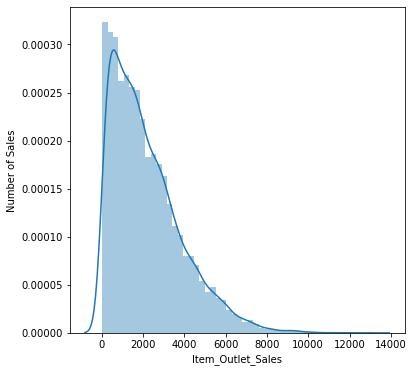

In [22]:

plt.figure(figsize=(6,6))
sns.distplot(train_bigmart_df['Item_Outlet_Sales'])
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.show

In [23]:
#Catigorical Fetures

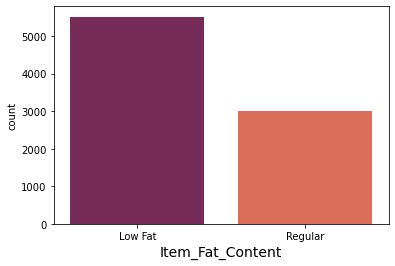

In [24]:
#Distribution of the variable:Item_Fat_Content

#Which product most sold the low fat or regular fat?
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train_bigmart_df ,palette='rocket')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

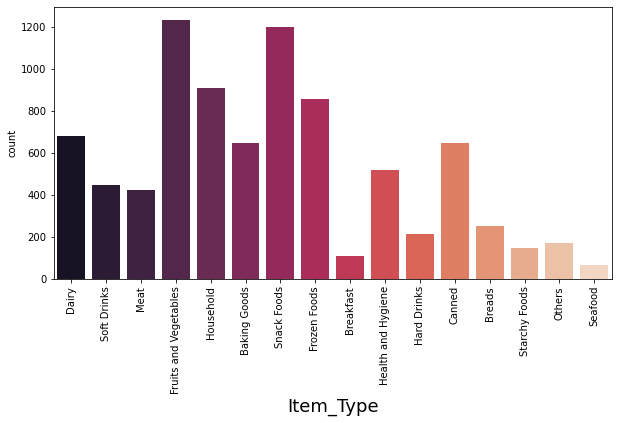

In [25]:
#Distribution of the variable: Item_Type

# What type of item has most sales?   
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Type' , data=train_bigmart_df,palette='rocket' )
plt.xlabel('Item_Type', fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [26]:
#from the plot we can see that Fruits and Vegetables ,Snack Foods and Household are more sold than the other items.

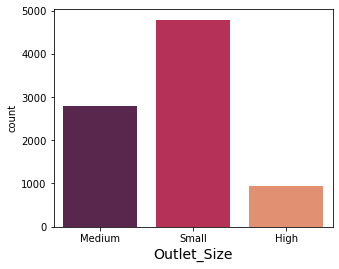

In [27]:
#Distribution of the variable:Outlet_Size

# what is the most common outlet size?
plt.figure(figsize=(5,4))
sns.countplot(x='Outlet_Size' , data=train_bigmart_df  ,palette='rocket')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

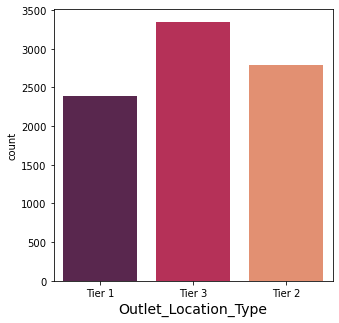

In [28]:
#Distribution of the variable:Outlet_Location_Type

#Where ara the most outlet located ?
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Location_Type' , data=train_bigmart_df,palette='rocket')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

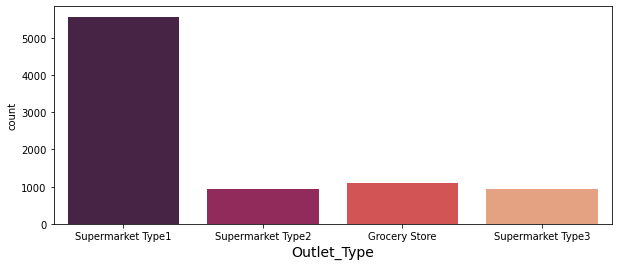

In [29]:
#Distribution of the variable :Outlet_Type
# What type of outlet has more sales?
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train_bigmart_df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

In [30]:
#Numerical fetures

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

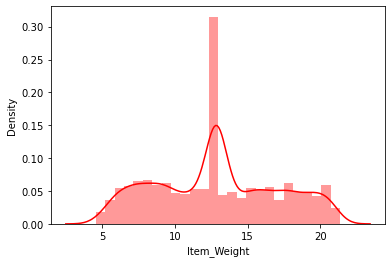

In [31]:
#item_weight distribution
plt.figure(figsize=None)
sns.distplot(train_bigmart_df['Item_Weight'],color='red')

#what is the avg weight of the products ? 

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

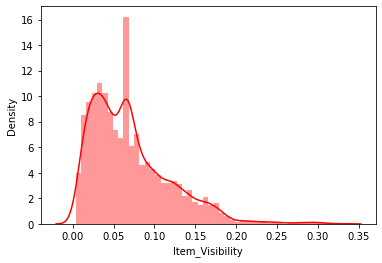

In [32]:
#Item_Visibility distribution
plt.figure(figsize=None)
sns.distplot(train_bigmart_df['Item_Visibility'],color='red')


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

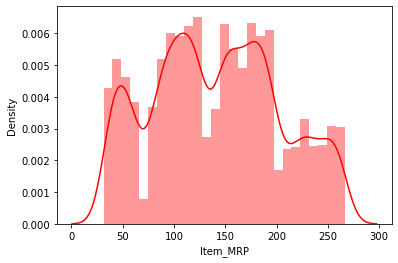

In [33]:
#Item_MRP distribution
plt.figure(figsize=None)
sns.distplot(train_bigmart_df['Item_MRP'],color='red')

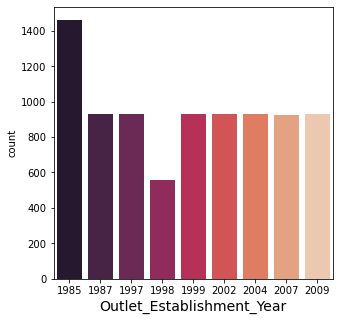

In [34]:
#Outlet_Establishment_Years distribution
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year' , data=train_bigmart_df,palette='rocket')
plt.xlabel('Outlet_Establishment_Year', fontsize=14)
plt.show()

# 2-Check the relationship between the target variable and others.

In [35]:
#Categorical Variables

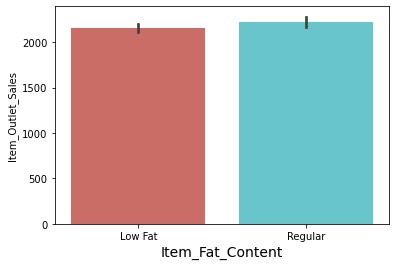

In [36]:
#sales per Item_Fat_Content 
sns.barplot('Item_Fat_Content' ,'Item_Outlet_Sales', data=train_bigmart_df,palette='hls' )
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()


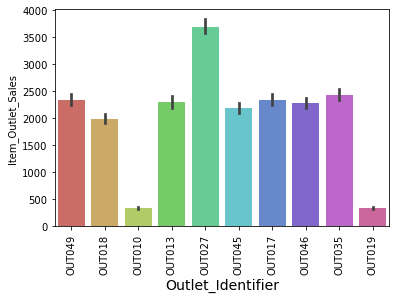

In [37]:
#sales per Outlet 
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train_bigmart_df ,palette='hls')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.xticks(rotation=90)
plt.show()

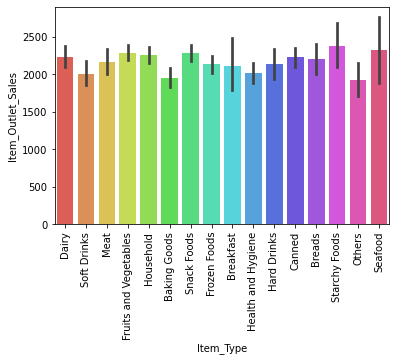

In [38]:
#Sales per item type
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train_bigmart_df,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()


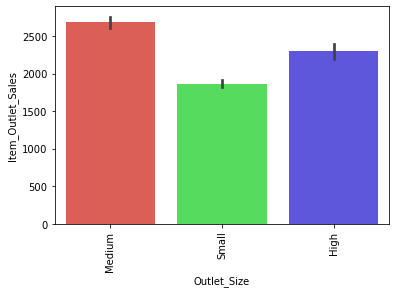

In [39]:
#Sales per outlet size
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train_bigmart_df,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()

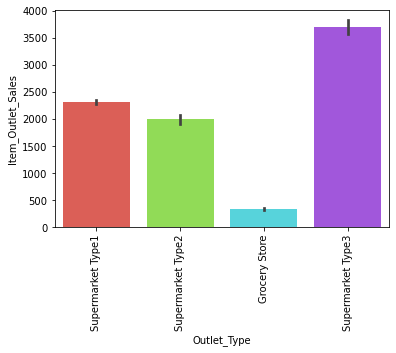

In [40]:
#Sales per outlet type
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train_bigmart_df,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()

In [41]:
# Plot all of the relationship between the target variable and the numirecal variable

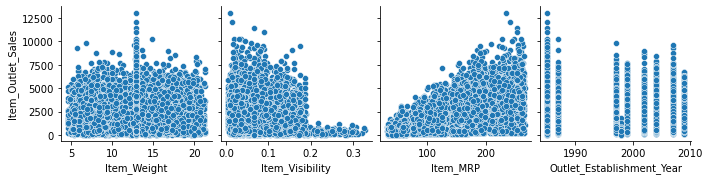

In [42]:
sns.pairplot(train_bigmart_df,x_vars=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'],y_vars='Item_Outlet_Sales');

# Corraltion Matrix

In [43]:
#check the correlation between Numerical variables and target variable:

In [44]:
#first get the numerical variables
num_features = train_bigmart_df.select_dtypes(include=[np.number])
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [45]:
#secound :check the Correlation
corr=num_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


In [46]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.134138
Name: Item_Outlet_Sales, dtype: float64

In [47]:
#we can see that Item_MRP have the most positive correlation and the Item_Visibility have the lowest correlation 
#with our target variable. 

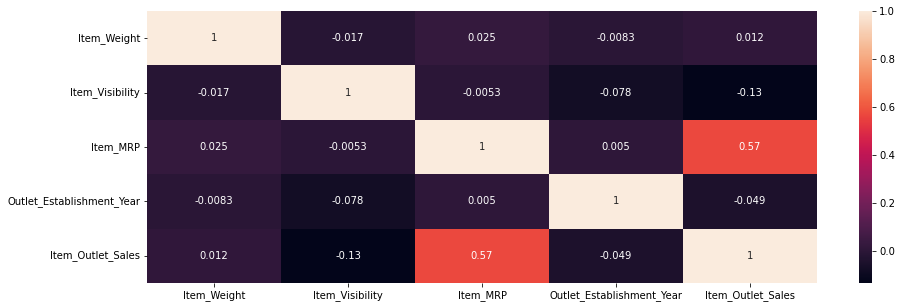

In [48]:
# Plot the correlations between the variables
plt.figure(figsize=(15,5))
sns.heatmap(train_bigmart_df.corr(),annot=True,)
plt.show()

# Drop unnessasery features 

In [9]:
#The columns Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier
#don't have significant values so we will drop them.
train_bigmart_df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
train_bigmart_df.head(2)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228


# Data Preprocessing 

In [10]:

#All catogrical variables will be Label encoded.
#The columns Outlet_Type and Item_Type will be One Hot encoded.

In [11]:
# Label encoding

le= LabelEncoder()
train_bigmart_df['Item_Fat_Content']=le.fit_transform(train_bigmart_df['Item_Fat_Content'])
train_bigmart_df['Item_Type']=le.fit_transform(train_bigmart_df['Item_Type'])
train_bigmart_df['Outlet_Size']=le.fit_transform(train_bigmart_df['Outlet_Size'])
train_bigmart_df['Outlet_Location_Type']=le.fit_transform(train_bigmart_df['Outlet_Location_Type'])
train_bigmart_df['Outlet_Type']=le.fit_transform(train_bigmart_df['Outlet_Type'])

train_bigmart_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.066132,6,182.0950,2,2,0,732.3800
4,8.93,0,0.066132,9,53.8614,0,2,1,994.7052


In [12]:
## **"one hot encoding"**

#from sklearn.preprocessing import OneHotEncoder
#cols = ['Item_Type','Outlet_Type']
## Apply one-hot encoder
#OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#train_bigmart_oh = pd.DataFrame(OH_encoder.fit_transform(train_bigmart_df[cols])).astype('int64')



#get feature columns
#train_bigmart_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
#train_bigmart_oh.index = train_bigmart_df.index


# Add one-hot encoded columns to our main df new name: train_bigmart_fe, test_bigmart_fe (means feature engeenired) 
#train_bigmart_fe = pd.concat([train_bigmart_df, train_bigmart_oh], axis=1)


In [13]:
#drop Item_Identifier
#train_bigmart_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type','Outlet_Type'],axis=1,inplace=True)
#test_bigmart_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type','Outlet_Type'],axis=1,inplace=True)


# Import libraries to built models

In [14]:
#Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

# Split the Data

In [15]:

x=train_bigmart_df.drop('Item_Outlet_Sales',axis=1)
y=train_bigmart_df['Item_Outlet_Sales']



In [16]:
x.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1,0,1
1,5.92,1,0.019278,14,48.2692,1,2,2


In [17]:
y.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

# Simple Validation Method: Train / Validation / Test

In [18]:
#***train/validation/test
# hold out 20% of the data for final testing
x1, x1_test, y1, y1_test = train_test_split(x, y, test_size=.2, random_state=10)
#split train dataset to train data and Validation data
x1_train,x1_val,y1_train,y1_val = train_test_split(x,y, test_size=.25, random_state=3) 
# 80% data will be used for training the model and rest 20% for Validation.
x1.shape,y1.shape ,x1_test.shape,y1_test.shape

((6818, 8), (6818,), (1705, 8), (1705,))

In [19]:
x1_train.shape,y1_train.shape,x1_val.shape,y1_val.shape

((6392, 8), (6392,), (2131, 8), (2131,))

In [20]:

#set up the 3 models we're choosing from:
lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

x1_train_scaled = scaler.fit_transform(x1_train.values)
x1_val_scaled = scaler.transform(x1_val.values)
x1_test_scaled = scaler.transform(x1_test.values)

lm_reg = Ridge(alpha=1)
#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2)

x1_train_poly = poly.fit_transform(x1_train.values)
x1_val_poly = poly.transform(x1_val.values)
x1_test_poly = poly.transform(x1_test.values)
lm_poly = LinearRegression()



In [21]:
#Now we can train, validate, and test.

In [22]:

#validate

lm.fit(x1_train, y1_train)
print(f'Linear Regression on validate data R^2: {lm.score(x1_val, y1_val):.3f}')

lm_reg.fit(x1_train_scaled, y1_train)
print(f'Ridge Regression on validate data R^2: {lm_reg.score(x1_val_scaled, y1_val):.3f}')

lm_poly.fit(x1_train_poly, y1_train)
print(f'Degree 2 polynomial regression on validate data R^2: {lm_poly.score(x1_val_poly, y1_val):.3f}')


Linear Regression on validate data R^2: 0.529
Ridge Regression on validate data R^2: 0.529
Degree 2 polynomial regression on validate data R^2: 0.619


In [23]:
#So having run this validation step, we see that the evidence points to Degree 2 polynomial regression being the best model.
#So our validation process lets us **select** that choice of model,
#and as our final step we retrain it on the entire chunk of train/val data and see how it does on test data:  

In [24]:
x1_poly = poly.transform(x1.values)
lm_poly.fit(x1_poly,y1)
print(f'Degree 2 polynomial regression on test data  R^2: {lm_poly.score(x1_test_poly, y1_test):.3f}')

Degree 2 polynomial regression on test data  R^2: 0.606


In [25]:
y_pred=np.round(lm_poly.predict(x1_test_poly))
y_pred

array([4516., 1819., 3143., ..., 1233., 2967., 2936.])

In [26]:
#Create table to see the difference between the Actual numbers and Predicted numbers
df = pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred})
df

,Actual,Predicted
7186,3649.2498,4516.0
2283,1845.5976,1819.0
2206,2675.1844,3143.0
5446,675.7870,1243.0
6380,3755.1120,3057.0
...,...,...
2879,491.3604,618.0
6094,165.7842,333.0
1598,1225.0720,1233.0
8012,3146.5708,2967.0


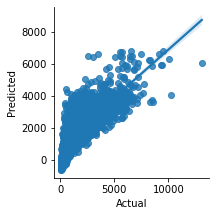

In [27]:
sns.pairplot(data= df, x_vars= 'Actual', y_vars= 'Predicted', size= 3, kind='reg');


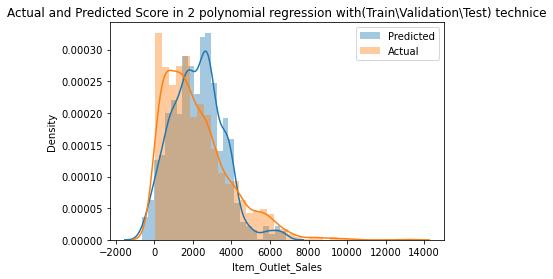

In [28]:
#Show the difference between the Actual numbers and Predicted numbers
sns.distplot(y_pred, label= 'Predicted' );
sns.distplot(y1_test, label= 'Actual');
plt.legend(loc='upper right')
plt.title('Actual and Predicted Score in 2 polynomial regression with(Train\Validation\Test) technice');

In [69]:
#**Cross-Validation / Test**#

In [70]:
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold


# split the data into train / test

In [72]:
## split the data into train and test set
# hold out 20% of the data for testing
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.2, random_state=101)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x2_train_std= sc.fit_transform(x2_train)
x2_test_std= sc.transform(x2_test)


In [73]:
# LinearRegression with(Train\Test) technice
#model
lm2 = LinearRegression()
#fit(train the model)
lm2.fit(x2_train_std, y2_train)
#predict(evaluation on test data)
test_data_pred = np.round(lm2.predict(x2_test_std))
#score variables()
lr_score=round(R2(y2_test,test_data_pred),3)

print(f'Linear Regression on test R^2:{lr_score:.3f}') 


Linear Regression on test R^2:0.511


In [74]:
#Create table to see the difference between the Actual numbers and Predicted numbers
df2 = pd.DataFrame({'Actual': y2_test, 'Predicted': test_data_pred})
df2

,Actual,Predicted
4414,3435.5280,3604.0
4255,323.5788,602.0
7402,1629.8784,2098.0
6141,4460.8600,2507.0
5361,1750.3882,2678.0
...,...,...
7710,255.6672,1309.0
4,994.7052,537.0
4353,3383.5956,2225.0
3592,2510.0660,3192.0


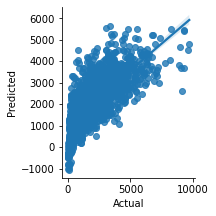

In [75]:
sns.pairplot(data= df2, x_vars= 'Actual', y_vars= 'Predicted', size= 3, kind='reg');

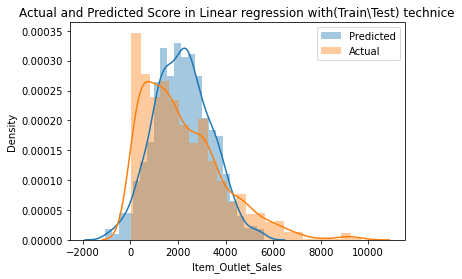

In [76]:
#Show the difference between the Actual numbers and Predicted numbers
sns.distplot(test_data_pred, label= 'Predicted' );
sns.distplot(y2_test, label= 'Actual');
plt.legend(loc='upper right')
plt.title('Actual and Predicted Score in Linear regression with(Train\Test) technice');

In [77]:
#RandomForestRegressor
#x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.4, random_state=0)
#model
RFR= RandomForestRegressor(n_estimators=1000)
#fit
RFR.fit(x2_train_std, y2_train)
#predict
RFR_test_data_predict = RFR.predict(x2_test_std)

#score variables
RFR_score=round(R2(y2_test,RFR_test_data_predict),3)

print(f"Random Forest Regression on test R^2: {RFR_score}\n")


Random Forest Regression on test R^2: 0.538



In [78]:
Random_Forest_Regressor=pd.DataFrame({'Actual':y2_test,'prediction':RFR_test_data_predict})
Random_Forest_Regressor

,Actual,prediction
4414,3435.5280,3855.910791
4255,323.5788,837.900645
7402,1629.8784,1129.020363
6141,4460.8600,2292.587756
5361,1750.3882,3501.754460
...,...,...
7710,255.6672,422.571276
4,994.7052,603.953172
4353,3383.5956,2778.171676
3592,2510.0660,3122.860330


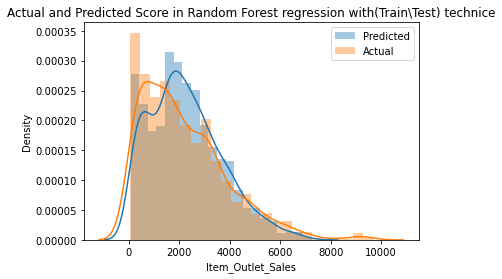

In [79]:
#Show the difference between the Actual numbers and Predicted numbers
sns.distplot(RFR_test_data_predict, label= 'Predicted' );
sns.distplot(y2_test, label= 'Actual');
plt.legend(loc='upper right')
plt.title('Actual and Predicted Score in Random Forest regression with(Train\Test) technice');

In [80]:
# Cross-Validation / Test

In [81]:
#polynomial 

In [82]:
#pip install xgboost

In [83]:
#import xgboost as xgb

In [84]:
#from xgboost import XGBRegressor

In [85]:

#model
#import xgboost 
#from xgboost import XGBRegressor
#XGB=XGBRFRegressor()
#fit(train the model)
#XGB.fit(x2_train, y2_train)
#predict(evaluation on test data)
#XGB_test_data_pred = np.round(XGB.predict(x2_test))
#score variables()
#XGB_score=round(R2(y2_test,XGB_test_data_pred),3)

#print(f'XGBoost Regression on test R^2:{XGB_score:.3f}') 


In [86]:
#XGB_Regressor=pd.DataFrame({'Actual':y2_test,'prediction':XGB_test_data_predict})
#XGB_Forest_Regressor

In [87]:
#sns.pairplot(data= XGB_Regressor, x_vars= 'Actual', y_vars= 'Predicted', size= 3, kind='reg');

In [88]:
#x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.4, random_state=0)
#Trying Polynomial Regression 
#Feature transforms for train and test so that we can run our poly model on each

x2_train_scaled = scaler.fit_transform(x2_train)
x2_test_scaled = scaler.transform(x2_test)
poly = PolynomialFeatures(degree=2) 

x2_train_poly = poly.fit_transform(x2_train_scaled)
x2_test_poly = poly.transform(x2_test_scaled)

lm_poly2 = LinearRegression()
lm_poly2.fit(x2_train_poly, y2_train)
##print(f'Degree 2 polynomial regression on train R^2: {lm_poly2.score(x2_train_poly, y2_train):.3f}')
print(f'Degree 2 polynomial regression on Test R^2: {lm_poly2.score(x2_test_poly, y2_test):.3f}')
y4_pred = np.round(lm_reg.predict(x2_test_scaled))
y4_pred

Degree 2 polynomial regression on Test R^2: 0.577


array([3634.,  646., 2100., ..., 2218., 3196., 2259.])

In [89]:
#Hyper Parameter Tuning

In [90]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]#number of trees witch will be part of the model
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)


grid_search_forest.fit(x2_train_std, y2_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.526 using {'n_estimators': 100}
0.483 (0.020) with: {'n_estimators': 10}
0.526 (0.017) with: {'n_estimators': 100}
0.524 (0.017) with: {'n_estimators': 1000}


In [91]:
grid_search_forest.best_params_


{'n_estimators': 100}

In [92]:
grid_search_forest.best_score_


0.5255770400842888

In [93]:
Y_pred_rf_grid=grid_search_forest.predict(x2_test_std)


In [94]:
#r2_score(y2_test,Y_pred_rf_grid)
HPRF_score=round(R2(y2_test,Y_pred_rf_grid),3)

print(f"Random Forest Regression with Hyper Parameter Tuning on test R^2: {HPRF_score}\n")


Random Forest Regression with Hyper Parameter Tuning on test R^2: 0.541



In [96]:

# lasso with(Train\Test) technice
#model
la = Lasso()
#fit(train the model)
la.fit(x2_train_std, y2_train)
#predict(evaluation on test data)
la_test_data_pred = np.round(la.predict(x2_test_std))
#score variables()
la_score=round(R2(y2_test,la_test_data_pred),3)

print(f'Lasso Regression on test R^2:{la_score:.3f}') 

Lasso Regression on test R^2:0.511
